# Linear Regression

### Task 2 @GRIP - The Sparks Foundation

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (6,4)
import seaborn as sns

In [2]:
#Importing dataset
url = input("Enter Link: ")
data = pd.read_csv(url)
print("Data Imported")

Enter Link: https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv
Data Imported


In [3]:
#Dataset
print(data)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


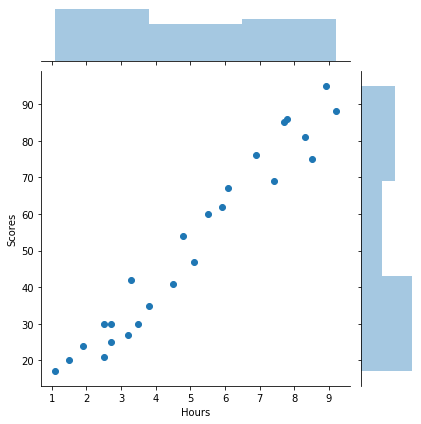

In [5]:
#Vizualizing the data
jp = sns.jointplot(data = data, x = 'Hours', y = 'Scores')

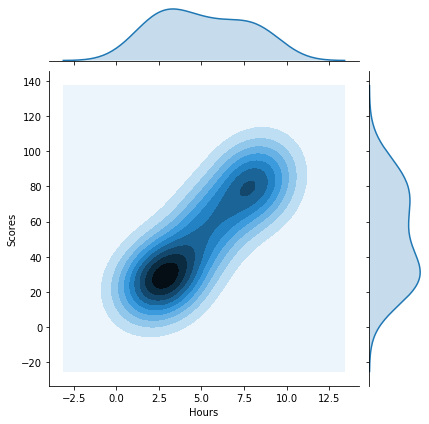

In [6]:
jp = sns.jointplot(data = data, x = 'Hours', y = 'Scores', kind = 'kde')

The above figures show a positive realtion i.e with increase in number of hours, the scores increase. A majority of the students study around 2.5 hours, get a score of 30%.

In [7]:
#Importing ML libararies
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split  

In [8]:
#Preparing the data
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

In [9]:
regressor = LR()
regressor.fit(x_train, y_train)
print("Regressor: ", regressor)
print("Training Over")

Regressor:  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Training Over


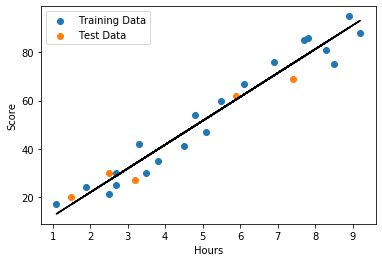

In [10]:
line = regressor.intercept_ + regressor.coef_*x

# Plotting for the test data
plt.scatter(x_train, y_train, label = 'Training Data')
plt.scatter(x_test, y_test, label = 'Test Data')
plt.legend()
plt.plot(x, line, color = 'black')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

In [11]:
#Comparison
y_pred = regressor.predict(x_test)
values = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
values

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


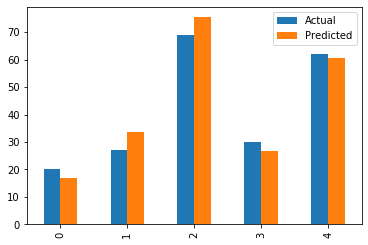

In [12]:
values.plot.bar()
plt.show()

In [13]:
#Test Data
hours = float(input("Enter hours: "))
hrs = np.array(hours)
pred = regressor.predict(hrs.reshape(-1,1))
print("Predicted Score = {}".format(pred[0]))

Enter hours: 9.25
Predicted Score = 93.69173248737538


In [14]:
#Evaluating Model
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
acc = regressor.score(x_test, y_test)
print('Accuracy:', round(acc*100,3), '%')

Mean Absolute Error: 4.183859899002975
Mean Square Error: 21.5987693072174
Root Mean Square Error: 4.6474476121003665
Accuracy: 94.549 %
